#DEEP LEARNING
##LAb 4

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Load CIFAR100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [16]:
print("CIFAR100 Dataset Information:")
print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test images shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

CIFAR100 Dataset Information:
Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 100)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 100)


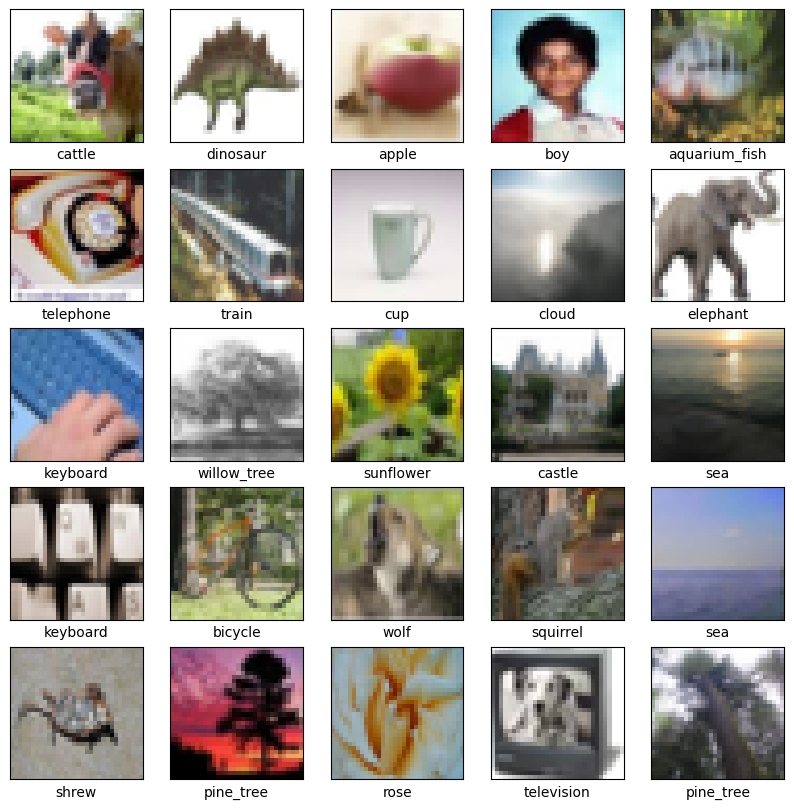

In [17]:
# Define class names for CIFAR100
class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle',
               'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle',
               'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach',
               'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish',
               'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp',
               'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle',
               'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree',
               'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum',
               'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew',
               'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
               'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train',
               'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# Plot sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()


In [18]:
# Define Dense Block
def dense_block(x, growth_rate, num_layers):
    for _ in range(num_layers):
        y = layers.Conv2D(growth_rate, 3, activation='relu', padding='same')(x)
        x = layers.concatenate([x, y], axis=-1)
    return x


In [19]:
# Build DenseNet model
def build_model(dense_connections=True):
    inputs = layers.Input(shape=(32, 32, 3))
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    x = dense_block(x, 32, 3)  # 3 dense blocks
    if dense_connections:
        x = layers.GlobalAveragePooling2D()(x)
    else:
        x = layers.Flatten()(x)
    outputs = layers.Dense(100, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model


In [7]:
# Compile and train model
def train_model(model, x_train, y_train, x_test, y_test):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test), verbose=1)


In [20]:
# Evaluate model performance
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)


In [9]:
# Build, train and evaluate model with dense connections
dense_model = build_model(dense_connections=True)
print("Model with Dense Connections:")
train_model(dense_model, x_train, y_train, x_test, y_test)

Model with Dense Connections:
Epoch 1/5
782/782 [==============================] - 1045s 1s/step - loss: 4.2730 - accuracy: 0.0486 - val_loss: 4.0844 - val_accuracy: 0.0756
Epoch 2/5
782/782 [==============================] - 1016s 1s/step - loss: 3.9790 - accuracy: 0.0915 - val_loss: 3.8738 - val_accuracy: 0.1060
Epoch 3/5
782/782 [==============================] - 1013s 1s/step - loss: 3.7834 - accuracy: 0.1158 - val_loss: 3.6954 - val_accuracy: 0.1326
Epoch 4/5
782/782 [==============================] - 1025s 1s/step - loss: 3.6441 - accuracy: 0.1417 - val_loss: 3.5833 - val_accuracy: 0.1542
Epoch 5/5
782/782 [==============================] - 1015s 1s/step - loss: 3.5353 - accuracy: 0.1616 - val_loss: 3.5239 - val_accuracy: 0.1700


In [10]:
evaluate_model(dense_model, x_test, y_test)

313/313 [==============================] - 44s 140ms/step
Accuracy: 0.17
Precision: 0.16414906754173422
Recall: 0.17
F1 Score: 0.14632455053557286


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
# Build, train and evaluate model without dense connections
no_dense_model = build_model(dense_connections=False)
print("\nModel without Dense Connections:")
train_model(no_dense_model, x_train, y_train, x_test, y_test)


Model without Dense Connections:
Epoch 1/5
782/782 [==============================] - 1310s 2s/step - loss: 3.3348 - accuracy: 0.2265 - val_loss: 2.8360 - val_accuracy: 0.3164
Epoch 2/5
782/782 [==============================] - 1274s 2s/step - loss: 2.1520 - accuracy: 0.4571 - val_loss: 2.6698 - val_accuracy: 0.3538
Epoch 3/5
782/782 [==============================] - 1302s 2s/step - loss: 1.1353 - accuracy: 0.7006 - val_loss: 3.1359 - val_accuracy: 0.3451
Epoch 4/5
782/782 [==============================] - 1302s 2s/step - loss: 0.3608 - accuracy: 0.9026 - val_loss: 4.2059 - val_accuracy: 0.3311
Epoch 5/5
782/782 [==============================] - 1300s 2s/step - loss: 0.1271 - accuracy: 0.9681 - val_loss: 5.2360 - val_accuracy: 0.3255


In [12]:
evaluate_model(no_dense_model, x_test, y_test)

313/313 [==============================] - 53s 171ms/step
Accuracy: 0.3255
Precision: 0.34454698793412053
Recall: 0.3255
F1 Score: 0.32169559006907594


313/313 [==============================] - 48s 152ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


313/313 [==============================] - 55s 175ms/step


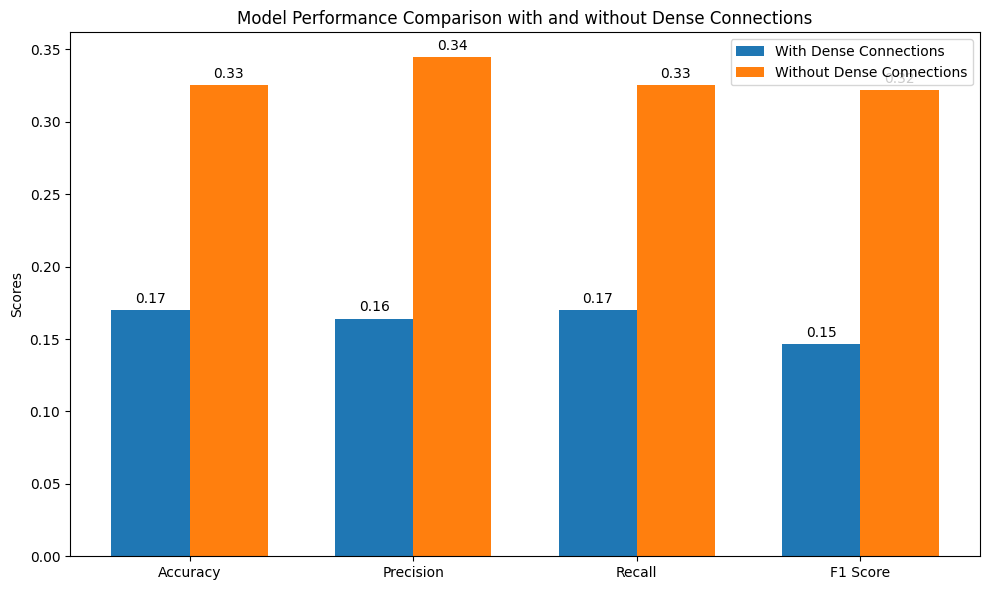

In [22]:
# Evaluate models
def evaluate_model_for_plot(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    return accuracy, precision, recall, f1

# Evaluate models
dense_results = evaluate_model_for_plot(dense_model, x_test, y_test)
no_dense_results = evaluate_model_for_plot(no_dense_model, x_test, y_test)

# Bar plot
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
dense_values = list(dense_results)
no_dense_values = list(no_dense_results)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, dense_values, width, label='With Dense Connections')
rects2 = ax.bar(x + width/2, no_dense_values, width, label='Without Dense Connections')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison with and without Dense Connections')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display values on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()
